# Birth and merge variational inference for Dirichlet process mixtures of Gaussians

## Goal

This demo walks you through a "Hello World" example of using **bnpy** from within Python.

We'll train a Dirichlet process (DP) Gaussian mixture model using memoized variational inference. 

We can use the following import statements to load bnpy.

In [1]:
import bnpy

In [2]:
import os

%pylab inline
from bnpy.viz.PlotUtil import ExportInfo
bnpy.viz.PlotUtil.ConfigPylabDefaults(pylab)

Populating the interactive namespace from numpy and matplotlib


## Toy dataset : `AsteriskK8`

We'll use a simple dataset of 2D points, drawn from 8 well-separated Gaussian clusters.

Our goal will be to recover the true set of 8 clusters.

In [3]:
import AsteriskK8
Data = AsteriskK8.get_data()

We can visualize this dataset as follows:

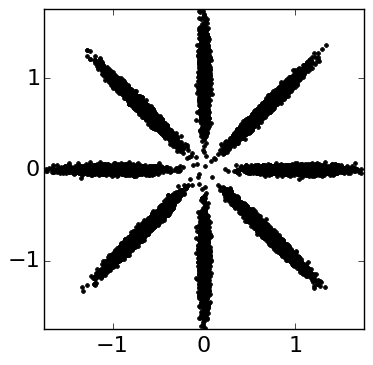

In [4]:
pylab.plot(Data.X[:,0], Data.X[:,1], 'k.');
pylab.axis('image'); 
pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);

# Running inference with **bnpy**

We'll fit a DP Gaussian mixture model, using birth and merge moves. We use the `moves` keyword argument to specify which moves to employ.

We'll look at several possible initial numbers of clusters, and show that the birth/merge moves consistently reach the ideal set of 8 clusters.

## 1 initial cluster, repeated for 2 trials

In [5]:
hmodel, RInfo = bnpy.run('AsteriskK8', 'DPMixtureModel', 'Gauss', 'moVB',
                         K=1, moves='birth,merge', 
                         jobname='demobirthmerge-Kinit=1',
                         nTask=5, nLap=20)

Asterisk Toy Data. 8 true clusters.


Entire Dataset Summary:


  total size: 25000 units
  batch size: 2500 units
  num. batches: 10


Data for Initialization:


  size: 25000 units (single observations)
  dimension: 2


Allocation Model:  DP mixture with K=1. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on each mean/prec matrix pair: mu, Lam
  E[ mu[k] ]     = [ 0.  0.]
  E[ CovMat[k] ] = 
  [[ 1.  0.]
   [ 0.  1.]]


Learn Alg: moVB


Trial  1/5 | alg. seed: 2497280 | data order seed: 8541952


savepath: /results/AsteriskK8/demobirthmerge-Kinit=1/1


    0.100/20 after      0 sec. | K    1 | ev -1.108127377e+00 |  


    0.200/20 after      0 sec. | K    1 | ev -1.108663274e+00 |  


    0.300/20 after      0 sec. | K    1 | ev -1.110766628e+00 |  


    1.000/20 after      0 sec. | K    1 | ev -1.104282665e+00 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 0/3 accepted. 


    2.000/20 after      1 sec. | K    5 | ev -1.016891994e+00 | Ndiff  545.066 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/5 accepted. 


    3.000/20 after      1 sec. | K    8 | ev -7.642300722e-01 | Ndiff 1068.284 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 3/8 accepted. ev increased  1.9837e-03


    4.000/20 after      2 sec. | K    9 | ev -4.743017979e-01 | Ndiff 1068.284 


BIRTH ACCEPTED. 5 fresh comps.


MERGE 2/9 accepted. ev increased  2.5825e-03


    5.000/20 after      3 sec. | K   12 | ev -3.074946741e-01 | Ndiff 1068.284 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 4/5 accepted. ev increased  1.3074e-02


    6.000/20 after      4 sec. | K   12 | ev -1.276881407e-01 | Ndiff 1068.284 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 5/7 accepted. ev increased  4.9037e-03


    7.000/20 after      5 sec. | K   11 | ev -2.572591276e-02 | Ndiff 1068.284 


MERGE 1/1 accepted. ev increased  4.6030e-04


    8.000/20 after      6 sec. | K   10 | ev -2.584905797e-03 | Ndiff 1068.284 


MERGE 1/1 accepted. ev increased  3.2250e-04


    9.000/20 after      6 sec. | K    9 | ev  1.109397198e-03 | Ndiff 1068.284 


MERGE 0/0 accepted. 


   10.000/20 after      7 sec. | K    9 | ev  1.803132779e-03 | Ndiff    4.367 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    9 | ev  1.996103141e-03 | Ndiff    0.794 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    9 | ev  2.072616626e-03 | Ndiff    0.198 


MERGE 1/1 accepted. ev increased  2.0252e-04


   13.000/20 after      8 sec. | K    8 | ev  2.408926998e-03 | Ndiff    0.198 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      9 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after     10 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     10 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     11 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     11 sec. | K    8 | ev  2.408927530e-03 | Ndiff    0.000 


... done. converged.


Trial  2/5 | alg. seed: 1128064 | data order seed: 7673856


savepath: /results/AsteriskK8/demobirthmerge-Kinit=1/2


    0.100/20 after      0 sec. | K    1 | ev -1.106116048e+00 |  


    0.200/20 after      0 sec. | K    1 | ev -1.106848843e+00 |  


    0.300/20 after      0 sec. | K    1 | ev -1.107106005e+00 |  


    1.000/20 after      0 sec. | K    1 | ev -1.104282665e+00 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 0/3 accepted. 


    2.000/20 after      1 sec. | K    5 | ev -1.034087643e+00 | Ndiff  461.926 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/5 accepted. ev increased  8.4192e-05


    3.000/20 after      1 sec. | K    7 | ev -7.444108143e-01 | Ndiff  461.926 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/6 accepted. ev increased  4.4727e-03


    4.000/20 after      2 sec. | K    8 | ev -4.684278566e-01 | Ndiff  461.926 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/6 accepted. ev increased  2.8012e-04


    5.000/20 after      3 sec. | K   10 | ev -3.695900973e-01 | Ndiff  461.926 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 4/7 accepted. ev increased  3.7992e-03


    6.000/20 after      4 sec. | K   10 | ev -1.409357981e-01 | Ndiff  461.926 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/5 accepted. ev increased  1.0351e-02


    7.000/20 after      5 sec. | K   10 | ev -2.126028050e-02 | Ndiff  461.926 


MERGE 0/1 accepted. 


    8.000/20 after      5 sec. | K   10 | ev -2.017934874e-03 | Ndiff   47.118 


MERGE 1/1 accepted. ev increased  1.3809e-04


    9.000/20 after      6 sec. | K    9 | ev  1.113776726e-03 | Ndiff   47.118 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    9 | ev  1.808072227e-03 | Ndiff    2.962 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    9 | ev  1.993362590e-03 | Ndiff    0.700 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    9 | ev  2.067939012e-03 | Ndiff    0.110 


MERGE 1/1 accepted. ev increased  2.0341e-04


   13.000/20 after      8 sec. | K    8 | ev  2.409556966e-03 | Ndiff    0.110 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.409564246e-03 | Ndiff    0.000 


... done. converged.


Trial  3/5 | alg. seed: 7143168 | data order seed: 7360256


savepath: /results/AsteriskK8/demobirthmerge-Kinit=1/3


    0.100/20 after      0 sec. | K    1 | ev -1.113373940e+00 |  


    0.200/20 after      0 sec. | K    1 | ev -1.103652558e+00 |  


    0.300/20 after      0 sec. | K    1 | ev -1.105701042e+00 |  


    1.000/20 after      0 sec. | K    1 | ev -1.104282665e+00 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/3 accepted. 


    2.000/20 after      0 sec. | K    4 | ev -1.096008110e+00 | Ndiff  165.298 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/6 accepted. 


    3.000/20 after      1 sec. | K    7 | ev -9.671579503e-01 | Ndiff  779.455 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/8 accepted. ev increased  1.0338e-03


    4.000/20 after      2 sec. | K    8 | ev -7.257171713e-01 | Ndiff  779.455 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 3/7 accepted. ev increased  2.2868e-03


    5.000/20 after      3 sec. | K    9 | ev -5.184263203e-01 | Ndiff  779.455 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/7 accepted. ev increased  1.4149e-03


    6.000/20 after      4 sec. | K   10 | ev -4.238587574e-01 | Ndiff  779.455 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 1/12 accepted. ev increased  4.4776e-03


    7.000/20 after      5 sec. | K   13 | ev -3.133490267e-01 | Ndiff  779.455 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 2/10 accepted. ev increased  9.2290e-04


    8.000/20 after      6 sec. | K   13 | ev -1.045695548e-01 | Ndiff  779.455 


MERGE 2/3 accepted. ev increased  8.3278e-04


    9.000/20 after      6 sec. | K   11 | ev -1.407874331e-02 | Ndiff  779.455 


MERGE 1/1 accepted. ev increased  4.8098e-04


   10.000/20 after      7 sec. | K   10 | ev -3.464817941e-04 | Ndiff  779.455 


MERGE 1/1 accepted. ev increased  2.2995e-04


   11.000/20 after      7 sec. | K    9 | ev  1.549113341e-03 | Ndiff  779.455 


MERGE 0/0 accepted. 


   12.000/20 after      8 sec. | K    9 | ev  1.895995357e-03 | Ndiff    1.982 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    9 | ev  2.018215892e-03 | Ndiff    0.201 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    9 | ev  2.099840497e-03 | Ndiff    0.133 


MERGE 1/1 accepted. ev increased  2.0252e-04


   15.000/20 after      9 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.133 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after     10 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     10 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     11 sec. | K    8 | ev  2.398224871e-03 | Ndiff    0.000 


... done. converged.


Trial  4/5 | alg. seed: 3040768 | data order seed: 900864


savepath: /results/AsteriskK8/demobirthmerge-Kinit=1/4


    0.100/20 after      0 sec. | K    1 | ev -1.115051376e+00 |  


    0.200/20 after      0 sec. | K    1 | ev -1.105426376e+00 |  


    0.300/20 after      0 sec. | K    1 | ev -1.104320009e+00 |  


    1.000/20 after      0 sec. | K    1 | ev -1.104282665e+00 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/4 accepted. 


    2.000/20 after      1 sec. | K    4 | ev -1.096593477e+00 | Ndiff  161.202 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/5 accepted. 


    3.000/20 after      1 sec. | K    7 | ev -9.965069592e-01 | Ndiff  701.527 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 3/8 accepted. ev increased  2.9853e-03


    4.000/20 after      2 sec. | K    8 | ev -6.905882442e-01 | Ndiff  701.527 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/6 accepted. ev increased  4.0281e-04


    5.000/20 after      3 sec. | K   10 | ev -5.063707041e-01 | Ndiff  701.527 


BIRTH ACCEPTED. 5 fresh comps.


MERGE 2/12 accepted. ev increased  8.8630e-04


    6.000/20 after      4 sec. | K   13 | ev -3.463223680e-01 | Ndiff  701.527 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 4/10 accepted. ev increased  5.0110e-03


    7.000/20 after      5 sec. | K   13 | ev -1.352863823e-01 | Ndiff  701.527 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 3/4 accepted. ev increased  2.2323e-03


    8.000/20 after      5 sec. | K   12 | ev -2.191910270e-02 | Ndiff  701.527 


MERGE 2/2 accepted. ev increased  6.9145e-04


    9.000/20 after      6 sec. | K   10 | ev -2.485986523e-03 | Ndiff  701.527 


MERGE 1/1 accepted. ev increased  5.3380e-04


   10.000/20 after      7 sec. | K    9 | ev  1.220526494e-03 | Ndiff  701.527 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    9 | ev  1.893819313e-03 | Ndiff    1.302 


MERGE 0/0 accepted. 


   12.000/20 after      8 sec. | K    9 | ev  2.017279224e-03 | Ndiff    0.502 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    9 | ev  2.085559824e-03 | Ndiff    0.138 


MERGE 1/1 accepted. ev increased  2.0253e-04


   14.000/20 after      8 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.138 


MERGE 0/0 accepted. 


   15.000/20 after      9 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     10 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.404416299e-03 | Ndiff    0.000 


... done. converged.


Trial  5/5 | alg. seed: 43008 | data order seed: 6479872


savepath: /results/AsteriskK8/demobirthmerge-Kinit=1/5


    0.100/20 after      0 sec. | K    1 | ev -1.102051363e+00 |  


    0.200/20 after      0 sec. | K    1 | ev -1.106053010e+00 |  


    0.300/20 after      0 sec. | K    1 | ev -1.105275056e+00 |  


    1.000/20 after      0 sec. | K    1 | ev -1.104282665e+00 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/3 accepted. 


    2.000/20 after      1 sec. | K    4 | ev -1.095192076e+00 | Ndiff  170.379 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/6 accepted. 


    3.000/20 after      1 sec. | K    7 | ev -9.551160032e-01 | Ndiff  752.486 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 1/9 accepted. ev increased  4.9033e-04


    4.000/20 after      2 sec. | K   10 | ev -6.429935777e-01 | Ndiff  752.486 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/6 accepted. ev increased  2.2997e-03


    5.000/20 after      3 sec. | K   10 | ev -4.264533199e-01 | Ndiff  752.486 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/6 accepted. ev increased  2.5779e-03


    6.000/20 after      4 sec. | K   11 | ev -2.883592790e-01 | Ndiff  752.486 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 2/7 accepted. ev increased  4.9923e-03


    7.000/20 after      5 sec. | K   13 | ev -1.069822486e-01 | Ndiff  752.486 


MERGE 2/2 accepted. ev increased  7.5542e-03


    8.000/20 after      6 sec. | K   11 | ev -1.401942361e-02 | Ndiff  752.486 


MERGE 2/2 accepted. ev increased  1.0662e-03


    9.000/20 after      6 sec. | K    9 | ev  6.563644951e-05 | Ndiff  752.486 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    9 | ev  1.580900927e-03 | Ndiff    7.959 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    9 | ev  1.896158703e-03 | Ndiff    1.227 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    9 | ev  2.006379102e-03 | Ndiff    0.182 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    9 | ev  2.089986839e-03 | Ndiff    0.006 


MERGE 1/1 accepted. ev increased  2.0253e-04


   14.000/20 after      8 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.006 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after     10 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     10 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.381981870e-03 | Ndiff    0.000 


... done. converged.


## 4 initial clusters, repeated for 5 independent initializations

In [6]:
hmodel, RInfo = bnpy.run('AsteriskK8', 'DPMixtureModel', 'Gauss', 'moVB',
                         K=4, moves='birth,merge', 
                         jobname='demobirthmerge-Kinit=4',
                         nTask=5, nLap=20)

Asterisk Toy Data. 8 true clusters.


Entire Dataset Summary:


  total size: 25000 units
  batch size: 2500 units
  num. batches: 10


Data for Initialization:


  size: 25000 units (single observations)
  dimension: 2


Allocation Model:  DP mixture with K=4. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on each mean/prec matrix pair: mu, Lam
  E[ mu[k] ]     = [ 0.  0.]
  E[ CovMat[k] ] = 
  [[ 1.  0.]
   [ 0.  1.]]


Learn Alg: moVB


Trial  1/5 | alg. seed: 2497280 | data order seed: 8541952


savepath: /results/AsteriskK8/demobirthmerge-Kinit=4/1


    0.100/20 after      0 sec. | K    4 | ev -1.047304800e+00 |  


    0.200/20 after      0 sec. | K    4 | ev -1.036752818e+00 |  


    0.300/20 after      0 sec. | K    4 | ev -1.034697291e+00 |  


    1.000/20 after      0 sec. | K    4 | ev -1.021824496e+00 |  


BIRTH ACCEPTED. 5 fresh comps.


MERGE 0/10 accepted. 


    2.000/20 after      1 sec. | K    9 | ev -8.816303504e-01 | Ndiff  563.551 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/6 accepted. ev increased  2.6682e-03


    3.000/20 after      2 sec. | K   10 | ev -5.113303580e-01 | Ndiff  563.551 


BIRTH ACCEPTED. 4 fresh comps.


MERGE 4/5 accepted. ev increased  2.1211e-03


    4.000/20 after      3 sec. | K   10 | ev -4.002681731e-01 | Ndiff  563.551 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/6 accepted. ev increased  7.8694e-04


    5.000/20 after      4 sec. | K   11 | ev -3.113172387e-01 | Ndiff  563.551 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 2/3 accepted. ev increased  3.7824e-03


    6.000/20 after      4 sec. | K   11 | ev -7.822969648e-02 | Ndiff  563.551 


MERGE 1/1 accepted. ev increased  6.1792e-04


    7.000/20 after      5 sec. | K   10 | ev -1.036240544e-02 | Ndiff  563.551 


MERGE 1/1 accepted. ev increased  4.2725e-04


    8.000/20 after      5 sec. | K    9 | ev  2.697950188e-04 | Ndiff  563.551 


MERGE 0/0 accepted. 


    9.000/20 after      5 sec. | K    9 | ev  1.646967412e-03 | Ndiff    5.863 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    9 | ev  1.920246795e-03 | Ndiff    0.956 


MERGE 0/0 accepted. 


   11.000/20 after      6 sec. | K    9 | ev  2.001534235e-03 | Ndiff    0.188 


MERGE 1/1 accepted. ev increased  2.2118e-04


   12.000/20 after      7 sec. | K    8 | ev  2.350332795e-03 | Ndiff    0.188 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.350562004e-03 | Ndiff    0.000 


... done. converged.


Trial  2/5 | alg. seed: 1128064 | data order seed: 7673856


savepath: /results/AsteriskK8/demobirthmerge-Kinit=4/2


    0.100/20 after      0 sec. | K    4 | ev -9.495577494e-01 |  


    0.200/20 after      0 sec. | K    4 | ev -9.343023972e-01 |  


    0.300/20 after      0 sec. | K    4 | ev -9.250155247e-01 |  


    1.000/20 after      0 sec. | K    4 | ev -9.060052809e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/5 accepted. 


    2.000/20 after      1 sec. | K    7 | ev -8.527296815e-01 | Ndiff  327.295 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/6 accepted. ev increased  9.5830e-03


    3.000/20 after      1 sec. | K    7 | ev -6.718527761e-01 | Ndiff  327.295 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/5 accepted. ev increased  6.1158e-04


    4.000/20 after      2 sec. | K    9 | ev -4.378927182e-01 | Ndiff  327.295 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 2/3 accepted. ev increased  6.5918e-03


    5.000/20 after      2 sec. | K    9 | ev -2.584362805e-01 | Ndiff  327.295 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 0/2 accepted. 


    6.000/20 after      3 sec. | K   11 | ev -1.643085956e-01 | Ndiff  465.042 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 3/3 accepted. ev increased  6.1574e-03


    7.000/20 after      4 sec. | K   10 | ev -2.531009200e-02 | Ndiff  465.042 


MERGE 0/0 accepted. 


    8.000/20 after      4 sec. | K   10 | ev -2.217996816e-03 | Ndiff   47.799 


MERGE 1/1 accepted. ev increased  3.7208e-04


    9.000/20 after      4 sec. | K    9 | ev  1.343588569e-03 | Ndiff   47.799 


MERGE 0/0 accepted. 


   10.000/20 after      5 sec. | K    9 | ev  1.896451034e-03 | Ndiff    1.319 


MERGE 0/0 accepted. 


   11.000/20 after      5 sec. | K    9 | ev  2.011138803e-03 | Ndiff    0.291 


MERGE 0/0 accepted. 


   12.000/20 after      6 sec. | K    9 | ev  2.120211961e-03 | Ndiff    0.020 


MERGE 1/1 accepted. ev increased  1.9889e-04


   13.000/20 after      6 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.020 


MERGE 0/0 accepted. 


   14.000/20 after      7 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      7 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      8 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      8 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after      9 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after      9 sec. | K    8 | ev  2.369082970e-03 | Ndiff    0.000 


... done. converged.


Trial  3/5 | alg. seed: 7143168 | data order seed: 7360256


savepath: /results/AsteriskK8/demobirthmerge-Kinit=4/3


    0.100/20 after      0 sec. | K    4 | ev -1.063716642e+00 |  


    0.200/20 after      0 sec. | K    4 | ev -1.031692404e+00 |  


    0.300/20 after      0 sec. | K    4 | ev -1.020911442e+00 |  


    1.000/20 after      0 sec. | K    4 | ev -9.839776845e-01 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 1/7 accepted. ev increased  4.8553e-04


    2.000/20 after      1 sec. | K    7 | ev -8.827579833e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/6 accepted. ev increased  2.9525e-03


    3.000/20 after      1 sec. | K    9 | ev -5.780838424e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/4 accepted. ev increased  4.8061e-03


    4.000/20 after      2 sec. | K    9 | ev -3.338276072e-01 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 2/2 accepted. ev increased  4.3990e-03


    5.000/20 after      2 sec. | K    9 | ev -2.109770751e-01 |  


MERGE 0/0 accepted. 


    6.000/20 after      3 sec. | K    9 | ev -7.330185231e-02 | Ndiff   67.968 


MERGE 0/0 accepted. 


    7.000/20 after      3 sec. | K    9 | ev -1.839006898e-02 | Ndiff   12.936 


MERGE 0/0 accepted. 


    8.000/20 after      4 sec. | K    9 | ev  1.912196744e-03 | Ndiff    0.244 


MERGE 0/0 accepted. 


    9.000/20 after      4 sec. | K    9 | ev  2.031589790e-03 | Ndiff    0.078 


MERGE 1/1 accepted. ev increased  2.0107e-04


   10.000/20 after      4 sec. | K    8 | ev  2.369669711e-03 | Ndiff    0.078 


MERGE 0/0 accepted. 


   11.000/20 after      5 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   12.000/20 after      5 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   13.000/20 after      6 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      6 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      7 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      7 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      8 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      8 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after      8 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after      8 sec. | K    8 | ev  2.369671254e-03 | Ndiff    0.000 


... done. converged.


Trial  4/5 | alg. seed: 3040768 | data order seed: 900864


savepath: /results/AsteriskK8/demobirthmerge-Kinit=4/4


    0.100/20 after      0 sec. | K    4 | ev -1.039830261e+00 |  


    0.200/20 after      0 sec. | K    4 | ev -1.013557772e+00 |  


    0.300/20 after      0 sec. | K    4 | ev -1.007427260e+00 |  


    1.000/20 after      0 sec. | K    4 | ev -9.893309075e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 1/5 accepted. ev increased  6.5180e-04


    2.000/20 after      1 sec. | K    6 | ev -9.268147346e-01 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 1/8 accepted. ev increased  2.5065e-03


    3.000/20 after      1 sec. | K    9 | ev -7.110583022e-01 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 2/6 accepted. ev increased  1.6780e-03


    4.000/20 after      2 sec. | K   11 | ev -3.845705311e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/5 accepted. ev increased  7.1067e-03


    5.000/20 after      3 sec. | K   11 | ev -8.750590576e-02 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 3/3 accepted. ev increased  1.0302e-02


    6.000/20 after      4 sec. | K   10 | ev -1.429972448e-02 |  


MERGE 0/0 accepted. 


    7.000/20 after      4 sec. | K   10 | ev -1.301529468e-03 | Ndiff   48.265 


MERGE 1/1 accepted. ev increased  4.1049e-04


    8.000/20 after      5 sec. | K    9 | ev  1.416556912e-03 | Ndiff   48.265 


MERGE 0/0 accepted. 


    9.000/20 after      5 sec. | K    9 | ev  1.854727035e-03 | Ndiff    0.949 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    9 | ev  1.987578028e-03 | Ndiff    0.769 


MERGE 0/0 accepted. 


   11.000/20 after      6 sec. | K    9 | ev  2.056943319e-03 | Ndiff    0.071 


MERGE 1/1 accepted. ev increased  2.0057e-04


   12.000/20 after      7 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.071 


MERGE 0/0 accepted. 


   13.000/20 after      7 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.378800088e-03 | Ndiff    0.000 


... done. converged.


Trial  5/5 | alg. seed: 43008 | data order seed: 6479872


savepath: /results/AsteriskK8/demobirthmerge-Kinit=4/5


    0.100/20 after      0 sec. | K    4 | ev -9.963528166e-01 |  


    0.200/20 after      0 sec. | K    4 | ev -9.797049428e-01 |  


    0.300/20 after      0 sec. | K    4 | ev -9.684724693e-01 |  


    1.000/20 after      0 sec. | K    4 | ev -9.495724293e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/7 accepted. 


    2.000/20 after      1 sec. | K    7 | ev -8.434029688e-01 | Ndiff  550.812 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/4 accepted. ev increased  6.7329e-03


    3.000/20 after      1 sec. | K    7 | ev -6.205641864e-01 | Ndiff  550.812 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 4/5 accepted. ev increased  6.3511e-03


    4.000/20 after      2 sec. | K    6 | ev -5.455781000e-01 | Ndiff  550.812 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 0/2 accepted. 


    5.000/20 after      2 sec. | K    8 | ev -4.599380076e-01 | Ndiff  457.816 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 0/6 accepted. 


    6.000/20 after      3 sec. | K   11 | ev -2.627878743e-01 | Ndiff  526.709 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/6 accepted. ev increased  6.7440e-03


    7.000/20 after      3 sec. | K   11 | ev -5.448061641e-02 | Ndiff  526.709 


BIRTH ACCEPTED. 3 fresh comps.


MERGE 4/4 accepted. ev increased  4.8991e-03


    8.000/20 after      4 sec. | K   10 | ev -6.445435016e-03 | Ndiff  526.709 


MERGE 1/1 accepted. ev increased  4.1021e-04


    9.000/20 after      4 sec. | K    9 | ev  7.121858236e-04 | Ndiff  526.709 


MERGE 0/0 accepted. 


   10.000/20 after      5 sec. | K    9 | ev  1.728512931e-03 | Ndiff    4.349 


MERGE 0/0 accepted. 


   11.000/20 after      5 sec. | K    9 | ev  1.954316769e-03 | Ndiff    0.689 


MERGE 0/0 accepted. 


   12.000/20 after      6 sec. | K    9 | ev  2.034884065e-03 | Ndiff    0.072 


MERGE 1/1 accepted. ev increased  2.0425e-04


   13.000/20 after      6 sec. | K    8 | ev  2.379233175e-03 | Ndiff    0.072 


MERGE 0/0 accepted. 


   14.000/20 after      6 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      7 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      7 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      7 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      8 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after      8 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after      8 sec. | K    8 | ev  2.379253104e-03 | Ndiff    0.000 


... done. converged.


## 16 initial clusters, repeated for 5 independent initializations

In [7]:
hmodel, RInfo = bnpy.run('AsteriskK8', 'DPMixtureModel', 'Gauss', 'moVB',
                         K=16, moves='birth,merge', 
                         jobname='demobirthmerge-Kinit=16',
                         nTask=5, nLap=20)

Asterisk Toy Data. 8 true clusters.


Entire Dataset Summary:


  total size: 25000 units
  batch size: 2500 units
  num. batches: 10


Data for Initialization:


  size: 25000 units (single observations)
  dimension: 2


Allocation Model:  DP mixture with K=16. Concentration gamma0= 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on each mean/prec matrix pair: mu, Lam
  E[ mu[k] ]     = [ 0.  0.]
  E[ CovMat[k] ] = 
  [[ 1.  0.]
   [ 0.  1.]]


Learn Alg: moVB


Trial  1/5 | alg. seed: 2497280 | data order seed: 8541952


savepath: /results/AsteriskK8/demobirthmerge-Kinit=16/1


    0.100/20 after      0 sec. | K   16 | ev -1.027305690e+00 |  


    0.200/20 after      0 sec. | K   16 | ev -9.753695193e-01 |  


    0.300/20 after      0 sec. | K   16 | ev -9.560752456e-01 |  


    1.000/20 after      0 sec. | K   16 | ev -8.879254976e-01 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 4/16 accepted. ev increased  2.9864e-03


    2.000/20 after      1 sec. | K   14 | ev -6.570084469e-01 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 4/8 accepted. ev increased  6.6230e-03


    3.000/20 after      2 sec. | K   12 | ev -3.465047823e-01 |  


MERGE 1/4 accepted. ev increased  5.9019e-04


    4.000/20 after      3 sec. | K   11 | ev -1.522618031e-01 |  


MERGE 1/2 accepted. ev increased  2.5773e-03


    5.000/20 after      3 sec. | K   10 | ev -3.498169425e-02 |  


MERGE 0/0 accepted. 


    6.000/20 after      4 sec. | K   10 | ev  2.837920014e-04 | Ndiff   20.621 


MERGE 1/1 accepted. ev increased  3.5597e-04


    7.000/20 after      5 sec. | K    9 | ev  1.688624507e-03 | Ndiff   20.621 


MERGE 0/0 accepted. 


    8.000/20 after      5 sec. | K    9 | ev  1.926058924e-03 | Ndiff    1.694 


MERGE 0/0 accepted. 


    9.000/20 after      6 sec. | K    9 | ev  2.006017744e-03 | Ndiff    0.184 


MERGE 1/1 accepted. ev increased  2.1958e-04


   10.000/20 after      6 sec. | K    8 | ev  2.353395676e-03 | Ndiff    0.184 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.353688739e-03 | Ndiff    0.000 


... done. converged.


Trial  2/5 | alg. seed: 1128064 | data order seed: 7673856


savepath: /results/AsteriskK8/demobirthmerge-Kinit=16/2


    0.100/20 after      0 sec. | K   16 | ev -1.006223491e+00 |  


    0.200/20 after      0 sec. | K   16 | ev -9.547728942e-01 |  


    0.300/20 after      0 sec. | K   16 | ev -9.252499010e-01 |  


    1.000/20 after      0 sec. | K   16 | ev -8.145731669e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 2/18 accepted. ev increased  6.9098e-04


    2.000/20 after      2 sec. | K   17 | ev -3.607285169e-01 |  


MERGE 3/10 accepted. ev increased  9.3908e-03


    3.000/20 after      3 sec. | K   14 | ev -1.012415763e-01 |  


MERGE 2/2 accepted. ev increased  7.2418e-04


    4.000/20 after      4 sec. | K   12 | ev -1.275171392e-02 |  


MERGE 2/2 accepted. ev increased  6.9119e-04


    5.000/20 after      4 sec. | K   10 | ev -7.502210663e-04 |  


MERGE 1/1 accepted. ev increased  3.8190e-04


    6.000/20 after      5 sec. | K    9 | ev  1.473841203e-03 |  


MERGE 0/0 accepted. 


    7.000/20 after      5 sec. | K    9 | ev  1.928947628e-03 | Ndiff    1.077 


MERGE 0/0 accepted. 


    8.000/20 after      5 sec. | K    9 | ev  2.035183484e-03 | Ndiff    0.215 


MERGE 0/0 accepted. 


    9.000/20 after      6 sec. | K    9 | ev  2.117391812e-03 | Ndiff    0.046 


MERGE 1/1 accepted. ev increased  1.9677e-04


   10.000/20 after      6 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.046 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     10 sec. | K    8 | ev  2.399714286e-03 | Ndiff    0.000 


... done. converged.


Trial  3/5 | alg. seed: 7143168 | data order seed: 7360256


savepath: /results/AsteriskK8/demobirthmerge-Kinit=16/3


    0.100/20 after      0 sec. | K   16 | ev -1.064099468e+00 |  


    0.200/20 after      0 sec. | K   16 | ev -1.002822919e+00 |  


    0.300/20 after      0 sec. | K   16 | ev -9.847034378e-01 |  


    1.000/20 after      1 sec. | K   16 | ev -9.302039537e-01 |  


BIRTH ACCEPTED. 4 fresh comps.


MERGE 1/23 accepted. ev increased  6.1131e-04


    2.000/20 after      2 sec. | K   19 | ev -7.391610852e-01 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 6/12 accepted. ev increased  6.5860e-03


    3.000/20 after      3 sec. | K   15 | ev -4.364739722e-01 |  


MERGE 4/6 accepted. ev increased  5.5374e-03


    4.000/20 after      4 sec. | K   11 | ev -3.056890227e-01 |  


MERGE 1/3 accepted. ev increased  6.5817e-04


    5.000/20 after      4 sec. | K   10 | ev -2.679240953e-01 |  


BIRTH ACCEPTED. 2 fresh comps.


MERGE 0/6 accepted. 


    6.000/20 after      5 sec. | K   12 | ev -1.719951639e-01 | Ndiff  382.350 


BIRTH ACCEPTED. 2 fresh comps.


MERGE 3/4 accepted. ev increased  6.4277e-03


    7.000/20 after      6 sec. | K   11 | ev -2.782321064e-02 | Ndiff  382.350 


MERGE 1/1 accepted. ev increased  4.4394e-04


    8.000/20 after      6 sec. | K   10 | ev -2.113114721e-03 | Ndiff  382.350 


MERGE 1/1 accepted. ev increased  2.4616e-04


    9.000/20 after      7 sec. | K    9 | ev  1.405799235e-03 | Ndiff  382.350 


MERGE 0/0 accepted. 


   10.000/20 after      7 sec. | K    9 | ev  1.889151549e-03 | Ndiff    2.134 


MERGE 0/0 accepted. 


   11.000/20 after      8 sec. | K    9 | ev  1.997134198e-03 | Ndiff    0.503 


MERGE 0/0 accepted. 


   12.000/20 after      8 sec. | K    9 | ev  2.086626998e-03 | Ndiff    0.052 


MERGE 1/1 accepted. ev increased  2.0659e-04


   13.000/20 after      9 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.052 


MERGE 0/0 accepted. 


   14.000/20 after      9 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after     10 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after     10 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after     11 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     11 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     11 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     12 sec. | K    8 | ev  2.369922331e-03 | Ndiff    0.000 


... done. converged.


Trial  4/5 | alg. seed: 3040768 | data order seed: 900864


savepath: /results/AsteriskK8/demobirthmerge-Kinit=16/4


    0.100/20 after      0 sec. | K   16 | ev -1.007814226e+00 |  


    0.200/20 after      0 sec. | K   16 | ev -9.510720978e-01 |  


    0.300/20 after      0 sec. | K   16 | ev -9.316144110e-01 |  


    1.000/20 after      0 sec. | K   16 | ev -8.509361293e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 3/18 accepted. ev increased  5.1116e-03


    2.000/20 after      2 sec. | K   16 | ev -4.995191419e-01 |  


MERGE 3/11 accepted. ev increased  6.6541e-03


    3.000/20 after      3 sec. | K   13 | ev -2.642942627e-01 |  


MERGE 2/4 accepted. ev increased  2.3323e-03


    4.000/20 after      3 sec. | K   11 | ev -7.482657810e-02 |  


MERGE 2/2 accepted. ev increased  5.5733e-03


    5.000/20 after      4 sec. | K    9 | ev -7.320202422e-03 |  


MERGE 0/0 accepted. 


    6.000/20 after      4 sec. | K    9 | ev  1.876328691e-03 | Ndiff    3.225 


MERGE 0/0 accepted. 


    7.000/20 after      5 sec. | K    9 | ev  2.017134995e-03 | Ndiff    0.377 


MERGE 0/0 accepted. 


    8.000/20 after      5 sec. | K    9 | ev  2.111620028e-03 | Ndiff    0.064 


MERGE 1/1 accepted. ev increased  2.0079e-04


    9.000/20 after      6 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.064 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   11.000/20 after      7 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   13.000/20 after      8 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      8 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      9 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after     10 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   20.000/20 after     11 sec. | K    8 | ev  2.384403108e-03 | Ndiff    0.000 


... done. converged.


Trial  5/5 | alg. seed: 43008 | data order seed: 6479872


savepath: /results/AsteriskK8/demobirthmerge-Kinit=16/5


    0.100/20 after      0 sec. | K   16 | ev -1.002675363e+00 |  


    0.200/20 after      0 sec. | K   16 | ev -9.539295956e-01 |  


    0.300/20 after      0 sec. | K   16 | ev -9.275625123e-01 |  


    1.000/20 after      1 sec. | K   16 | ev -8.419769368e-01 |  


BIRTH ACCEPTED. 3 fresh comps.


MERGE 4/13 accepted. ev increased  1.0012e-02


    2.000/20 after      2 sec. | K   15 | ev -4.166720388e-01 |  


MERGE 4/7 accepted. ev increased  7.3577e-03


    3.000/20 after      3 sec. | K   11 | ev -1.868932931e-01 |  


MERGE 2/2 accepted. ev increased  1.7360e-03


    4.000/20 after      3 sec. | K    9 | ev -6.610300898e-02 |  


MERGE 1/1 accepted. ev increased  7.1917e-04


    5.000/20 after      4 sec. | K    8 | ev -1.933835833e-02 |  


MERGE 0/0 accepted. 


    6.000/20 after      4 sec. | K    8 | ev  2.346608597e-03 | Ndiff    3.104 


MERGE 0/0 accepted. 


    7.000/20 after      4 sec. | K    8 | ev  2.370859593e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


    8.000/20 after      5 sec. | K    8 | ev  2.370864516e-03 | Ndiff    0.001 


MERGE 0/0 accepted. 


    9.000/20 after      5 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   10.000/20 after      6 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   11.000/20 after      6 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   12.000/20 after      7 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   13.000/20 after      7 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   14.000/20 after      7 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   15.000/20 after      8 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   16.000/20 after      8 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   17.000/20 after      9 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   18.000/20 after      9 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


MERGE 0/0 accepted. 


   19.000/20 after     10 sec. | K    8 | ev  2.370864518e-03 | Ndiff    0.000 


... done. converged.


# Using bnpy visualization tools to assess performance

## Trace plot of objective function over time.

Here, for each run we plot a trace of the objective function (sometimes called the ELBO) as the algorithm sees more training data.

The different colors correspond to different number of initial components.

**Conclusion:** All the different initial conditions quickly converge to similar scores of high quality.

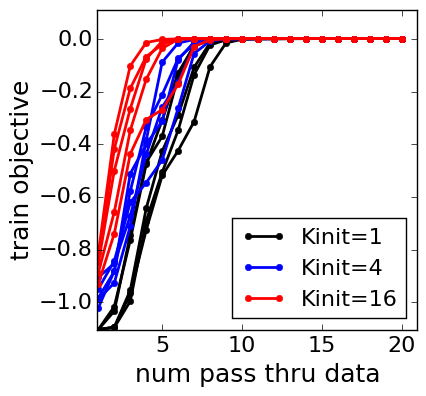

In [8]:
bnpy.viz.PlotELBO.plotJobsThatMatch('AsteriskK8/demobirthmerge-*');
pylab.legend(loc='lower right');

## Trace plot of number of clusters over time.

** Conclusion:** Across very different initial conditions, we consistently reach exactly 8 learned clusters.

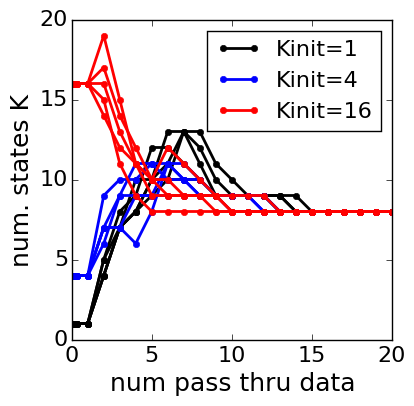

In [9]:
bnpy.viz.PlotTrace.plotJobsThatMatch('AsteriskK8/demobirthmerge-*', yvar='K');
pylab.ylabel('num. states K');

# Plot the learned cluster centers

## First, the 5 different *initializations*

Each subplot corresponds to one single initialization.

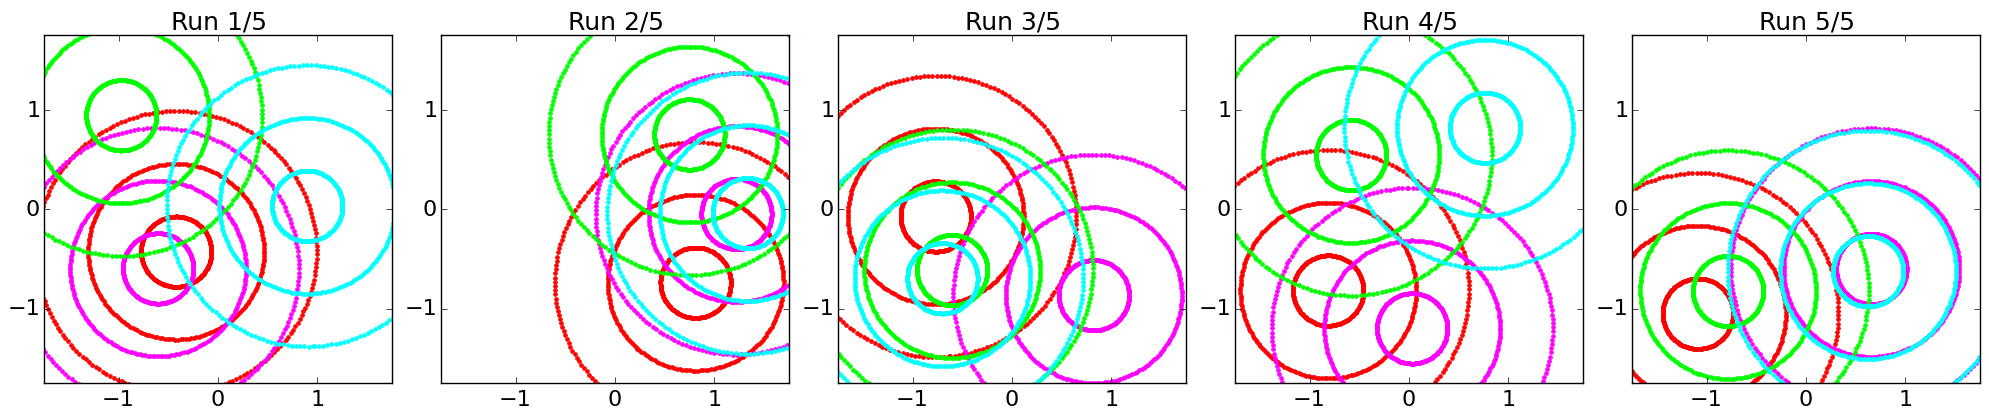

In [10]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=0);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## After 1 lap 

Showing each run after one complete pass through the dataset (all 10 batches).

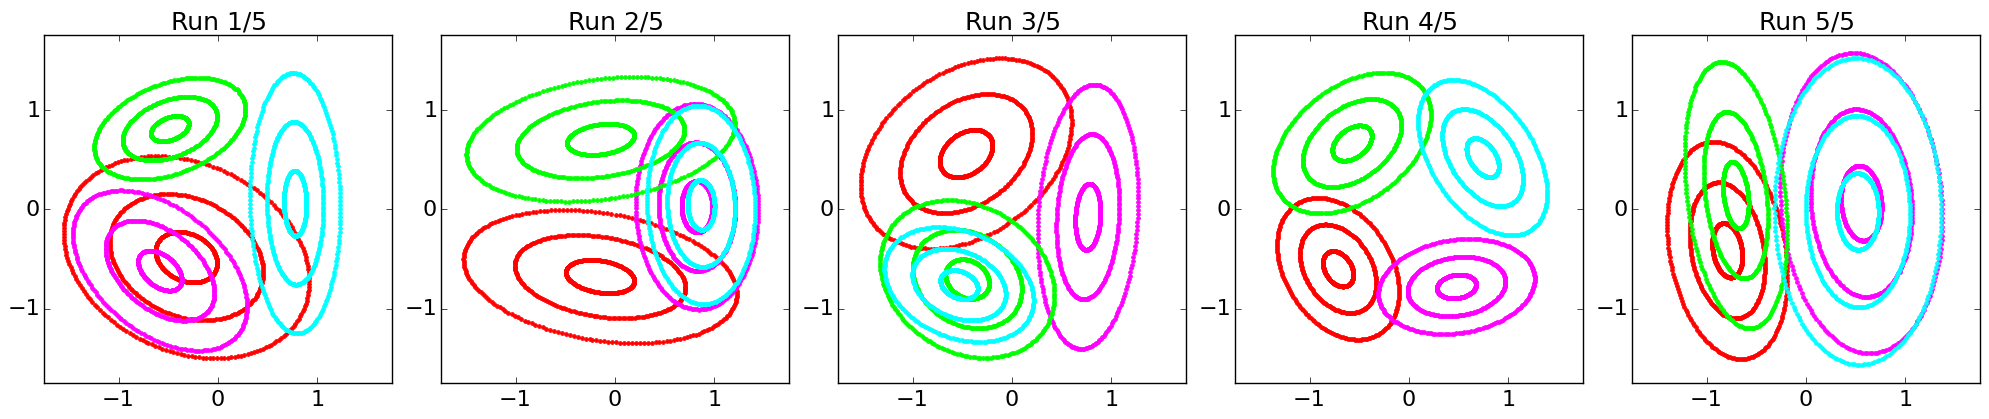

In [11]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=1);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## After 2 laps 

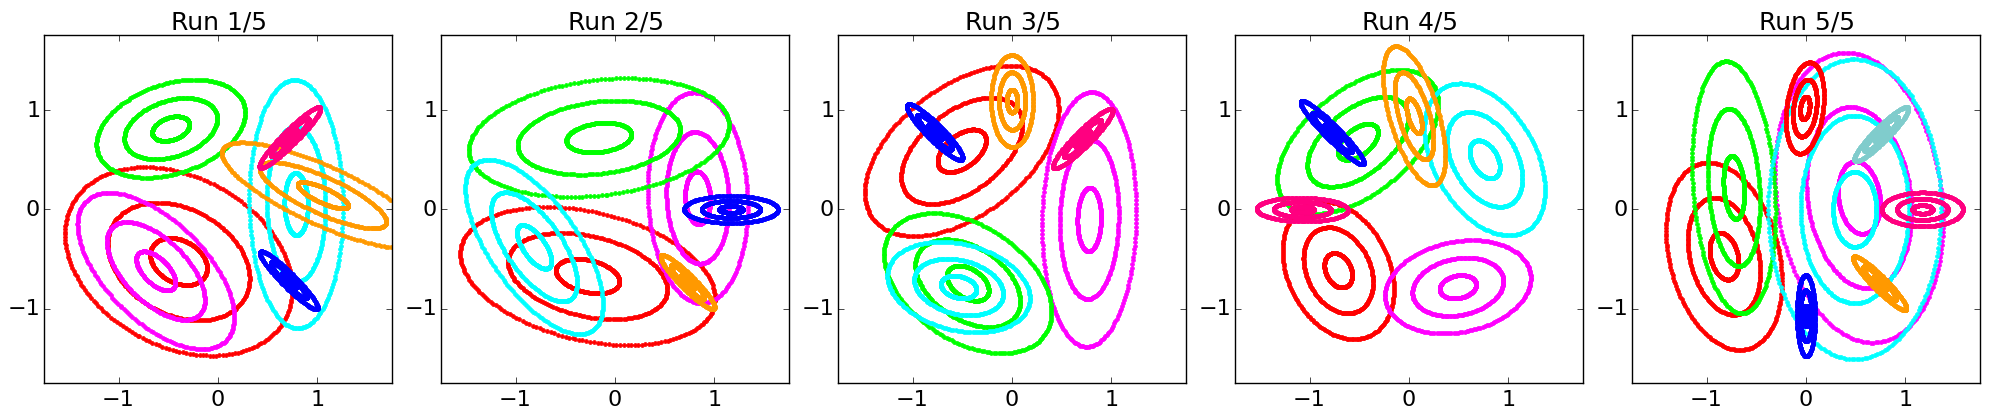

In [12]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=2);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## After 4 laps

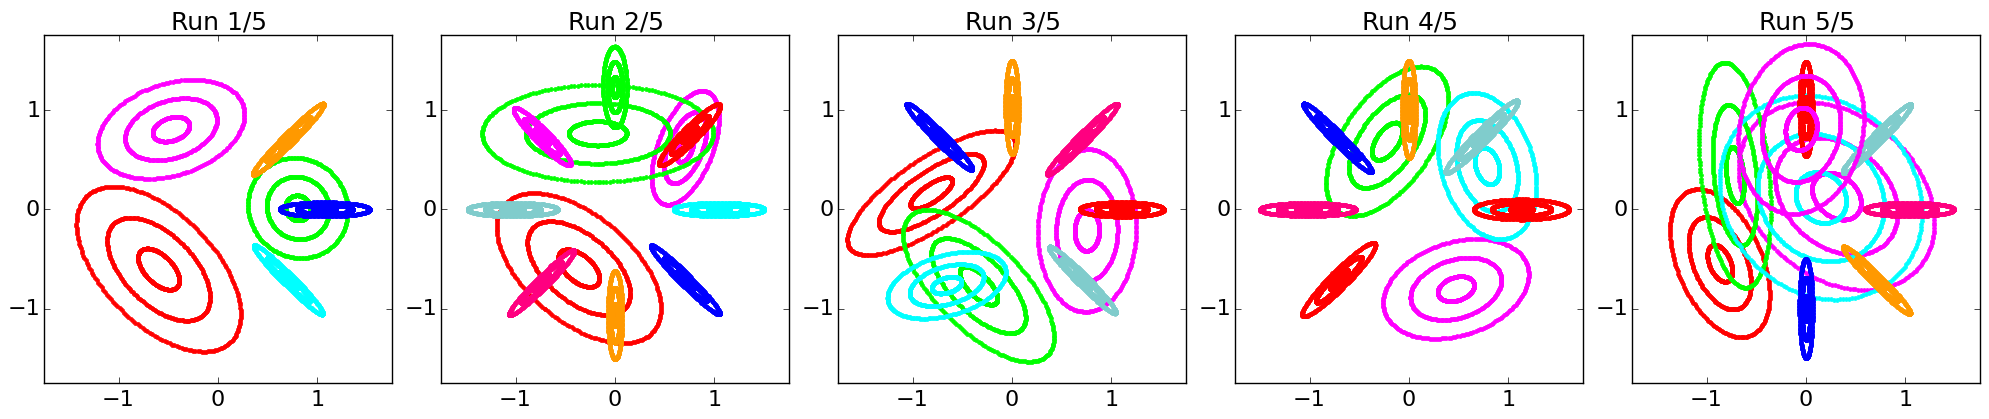

In [13]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=4);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## After 10 laps

SKIPPED 1 comps with size below 0.00


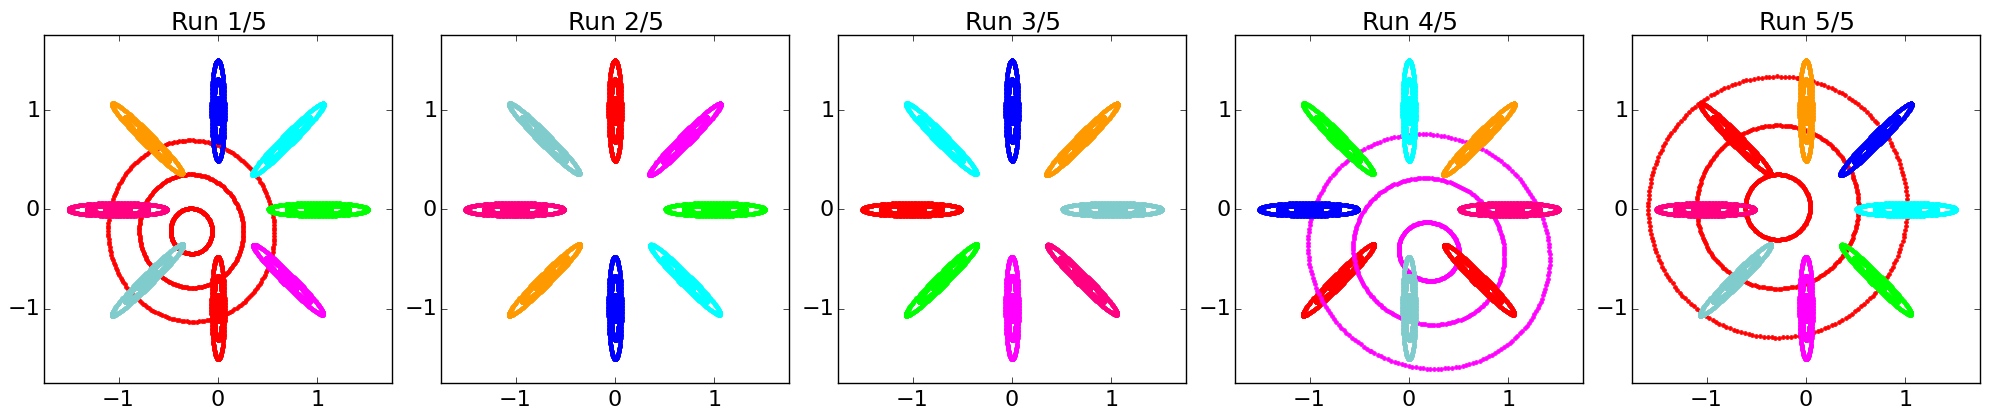

In [14]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=10);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## After 20 laps

**Conclusion**: All runs identify the ideal set of 8 true clusters.

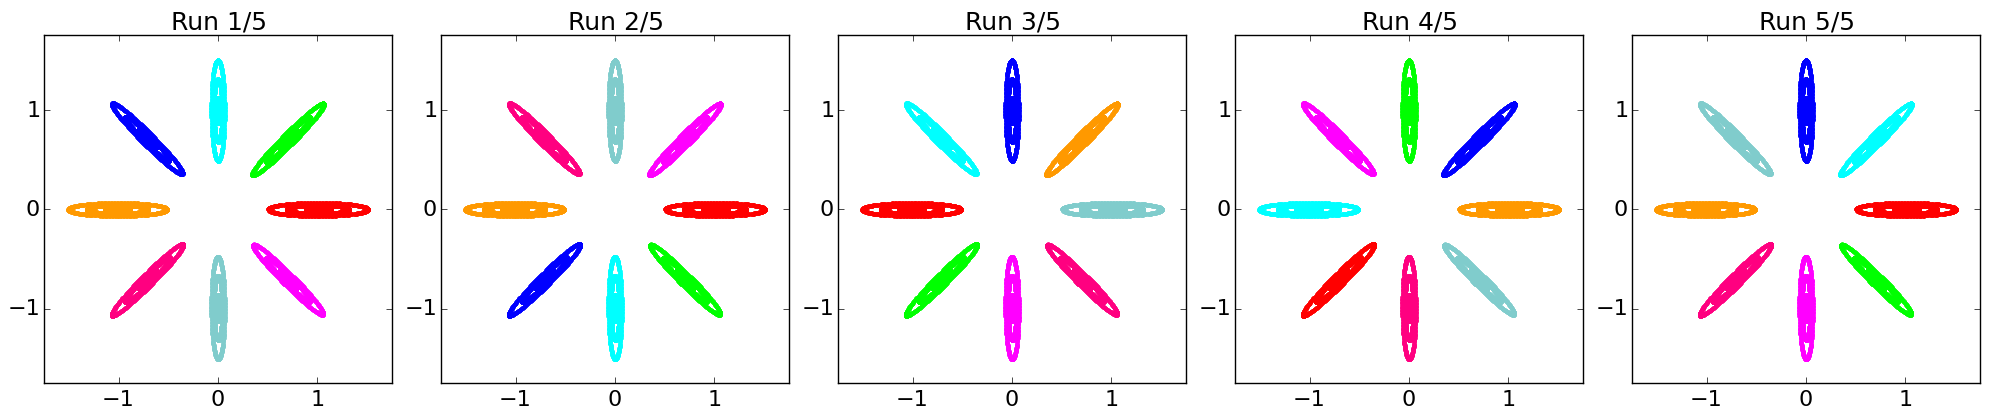

In [15]:
figH, axH = pylab.subplots(nrows=1, ncols=5, figsize=(20,4))
for plotID, rank in enumerate([1,2,3,4,5]):
    pylab.subplot(1, 5, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]); pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);
    pylab.title('Run %d/5' % (rank))
pylab.tight_layout()

## Grid plot: Evolution of learned clusters over time

Each column is a separate run

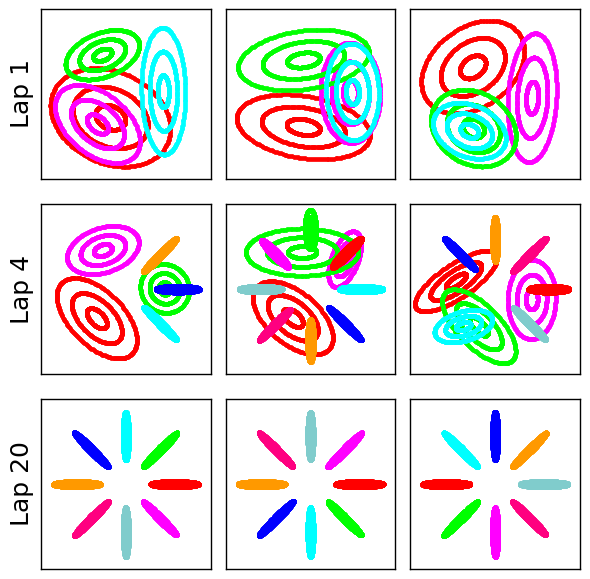

In [16]:
laps = [1,4,20]
ranks = [1,2,3]
nrows = len(laps)
ncols = len(ranks)

figH, axH = pylab.subplots(nrows=nrows, ncols=ncols, figsize=(2*nrows,2*ncols))
for plotID in range(nrows*ncols):
    lap = laps[plotID // nrows]
    rank = ranks[plotID % ncols]
    pylab.subplot(nrows, ncols, plotID+1)
    taskidstr = '.rank%d' % (rank)
    bnpy.viz.PlotComps.plotCompsForJob('AsteriskK8/demobirthmerge-Kinit=4/', taskids=[taskidstr], figH=figH, lap=lap);
    pylab.axis('image'); pylab.xlim([-1.75, 1.75]); pylab.xticks([]); pylab.ylim([-1.75, 1.75]); pylab.yticks([]);
    if rank == 1:
        pylab.ylabel('Lap %d' % (lap))
pylab.tight_layout()

# Ignore this block. Only needed for auto-generation of documentation.
if ExportInfo['doExport']:
    W_in, H_in = pylab.gcf().get_size_inches()
    figpath100 = '../docs/source/_static/GaussianToyData_DPMixtureModel_MemoizedWithBirthsAndMerges_%dx%d.png' % (100, 100)
    pylab.savefig(figpath100, bbox_inches=0, pad_inches=0, dpi=ExportInfo['dpi']/W_in);